# 4.2 Finding interactions and regions of interactions

### Interaction model

$Y = 0.2X_{1} - 5X_{2} + 10X_2\mathbb{1}_{X_{3} \geq 0} + \varepsilon$,

$\varepsilon \overset{\text{iid}}{\sim} \mathcal{N}(0,1),\quad X_{1},X_{2},X_{3}\overset{\text{iid}}{\sim}U(-1,1) $

In [104]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

import seaborn as sns
from pycebox.ice import ice, ice_plot
from matplotlib.cm import seismic

# import sympy as sym
from sympy import *

In [118]:
x1,x2,x3,y,yprime = [],[],[],[],[]
N = 1000

for i in range(0,N):
    X1 = np.random.uniform(-1, 1, size = 1)
    X2 = np.random.uniform(-1, 1, size = 1)
    X3 = np.random.uniform(-1, 1, size = 1)
    eps = np.random.uniform(0, 1, size = 1)
    Y = 0.2*X1 - 5*X2 + 10*X2*(X3>0) + eps

    x1.append(X1)
    x2.append(X2)
    x3.append(X3)
    
    X3 = Symbol('X3')
    der_y = lambdify(X3, Y)
    y_der = der_y(X3)
    

    y.append(Y)
    yprime.append(y_der)

In [119]:
yprime = np.array(yprime)
data = np.concatenate([x1,x2,x3,y,yprime], axis = 1)
df = pd.DataFrame(data, columns=['X1','X2','X3','Y','Yprime'])

In [120]:
df

,X1,X2,X3,Y,Yprime
0,-0.338093,-0.084275,-0.595002,0.407253,0.407253
1,0.582738,0.273395,-0.019854,-1.152591,-1.152591
2,-0.458860,-0.893905,-0.873435,4.578279,4.578279
3,0.748917,-0.221966,0.620604,-0.509440,-0.509440
4,0.309883,-0.105869,0.811016,0.516461,0.516461
...,...,...,...,...,...
995,0.990338,-0.944645,-0.064512,5.097646,5.097646
996,-0.580384,0.775755,0.897354,4.314659,4.314659
997,0.222195,0.517397,-0.702898,-2.252765,-2.252765
998,0.879646,-0.899246,0.753643,-3.934264,-3.934264


In [121]:
X = df[['X1','X2','X3']]
y = df.Y
yprime = df.Yprime

In [125]:
ice_df = ice(X, 'X3', clf.predict)

In [122]:
clf = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1,
        max_depth=3, random_state=0).fit(X,y)

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

In [124]:
scores

array([0.96927958, 0.96162799, 0.96478913, 0.93396571, 0.96786976])

In [126]:
ice_df.head()

data_X3,-0.997172,-0.996564,-0.992282,-0.992134,-0.990192,-0.989683,-0.988149,-0.988017,-0.982979,-0.982731,...,0.983570,0.984994,0.986717,0.989341,0.993841,0.995099,0.997311,0.997643,0.998421,0.999855
X1,0.922825,-0.777871,0.303940,0.366433,-0.912816,0.154280,-0.827577,-0.860957,0.590085,0.422321,...,0.054894,0.363729,-0.217623,-0.461785,0.293790,0.382825,-0.395540,0.401034,-0.307885,0.433182
X2,-0.078087,0.037986,0.608453,0.525146,0.530517,-0.551559,-0.279662,-0.912598,0.539754,-0.154074,...,0.604182,-0.104176,0.218235,-0.205297,-0.590554,-0.942947,-0.966663,-0.590365,-0.454333,0.126978
X3,,,,,,,,,,,,,,,,,,,,,
-0.997172,1.169619,0.371781,-2.687148,-1.923469,-2.665161,3.429358,1.862105,5.048992,-2.056136,1.542147,...,-2.535073,1.260133,-0.527619,1.802426,3.469661,5.917863,7.144166,3.325201,2.894303,-0.018702
-0.996564,1.169619,0.371781,-2.687148,-1.923469,-2.665161,3.429358,1.862105,5.048992,-2.056136,1.542147,...,-2.535073,1.260133,-0.527619,1.802426,3.469661,5.917863,7.144166,3.325201,2.894303,-0.018702
-0.992282,1.176570,0.376683,-2.678663,-1.914984,-2.668744,3.436310,1.865474,5.043876,-2.047651,1.549098,...,-2.526589,1.267085,-0.519134,1.805795,3.476612,5.924814,7.147535,3.332152,2.901255,-0.010217
-0.992134,1.258951,0.474365,-2.588997,-1.825318,-2.597018,3.518691,1.961475,5.108318,-1.957985,1.631479,...,-2.436923,1.349466,-0.435072,1.901797,3.558993,6.007196,7.243536,3.414534,3.003991,0.073844
-0.990192,1.149151,0.368012,-2.708886,-1.945207,-2.716907,3.408891,1.851675,5.028019,-2.077874,1.521679,...,-2.556812,1.239666,-0.541425,1.791996,3.449193,5.926897,7.163238,3.304733,2.894190,-0.032508


Text(0.5, 1.0, 'ICE (10 curves)')

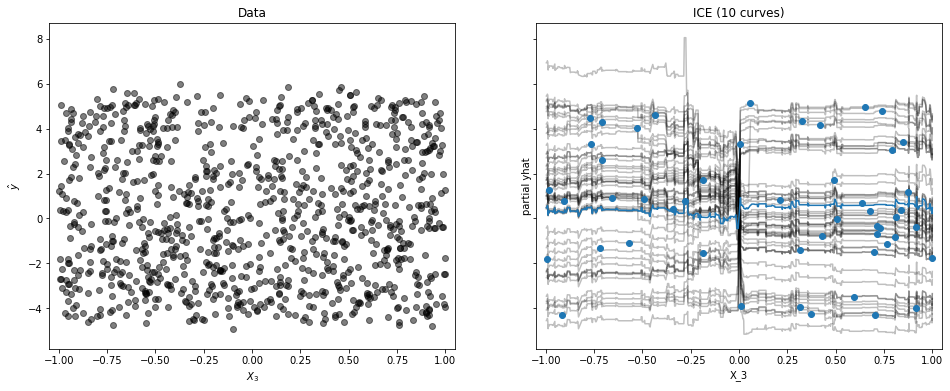

In [127]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))

data_ax.scatter(X.X3, y, c='k', alpha=0.5);

data_ax.set_xlim(-1.05, 1.05);
data_ax.set_xlabel('$X_3$');

data_ax.set_ylabel('$\hat{y}$');

data_ax.set_title('Data');

ice_plot(ice_df, frac_to_plot=0.05, plot_pdp=True,
         plot_points=True,
         c='k', alpha=0.25,
         ax=ice_ax)

ice_ax.set_xlabel('X_3')

ice_ax.set_ylabel('partial yhat')

ice_ax.set_title('ICE (10 curves)')